In [55]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [56]:
city_data_upload = "Pyber/data/city_data.csv"
ride_data_upload = "Pyber/data/ride_data.csv"


In [57]:
city_data = pd.read_csv(city_data_upload)
ride_data = pd.read_csv(ride_data_upload)


df = pd.merge(ride_data, city_data, on="city", how="left")


df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [58]:
df = df.groupby(['city', 'type'])
df = pd.DataFrame(round(df.mean(),2))
df.head()

,,fare,ride_id,driver_count
city,type,,,
Amandaburgh,Urban,24.64,5.359336e+12,12.0
Barajasview,Urban,25.33,4.676968e+12,26.0
Barronchester,Suburban,36.42,4.460796e+12,11.0
Bethanyland,Suburban,32.96,5.842550e+12,22.0
Bradshawfurt,Rural,40.06,3.735294e+12,7.0


In [59]:
df = pd.merge(ride_data, city_data, on="city", how="left")
rpc_df = df.groupby('city')['ride_id'].count()
rpc = pd.DataFrame(rpc_df)
rpc.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [64]:
total_fares = df.groupby('type')['fare'].sum()
total_fares = pd.DataFrame(total_fares)
total_fares['% of total fares by city type'] = total_fares['fare']/total_fares['fare'].sum()*100
total_fares


,fare,% of total fares by city type
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


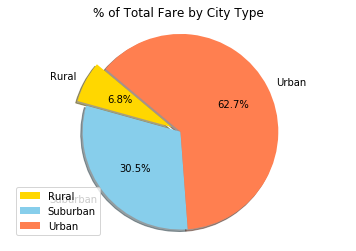

In [74]:
labels = 'Rural', 'Suburban', 'Urban'
sizes = [6.8, 30.5, 62.7,]
colors = ['gold','skyblue','coral']
explode = (0.1, 0, 0,)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.legend(labels,loc=3)
plt.title("% of Total Fare by City Type")
plt.show()


In [75]:
total_rides = df.groupby('type')['ride_id'].sum()
total_rides = pd.DataFrame(total_rides)
total_rides['% of total rides by city type'] = total_rides['ride_id']/total_rides['ride_id'].sum()* 100
total_rides

,ride_id,% of total rides by city type
type,,
Rural,580968240341287,5.005212
Suburban,3106884522576766,26.766722
Urban,7919412664056093,68.228066


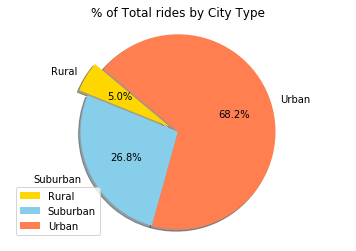

In [76]:
labels = 'Rural', 'Suburban', 'Urban'
sizes = [5, 26.8, 68.2,]
colors = ['gold','skyblue','coral']
explode = (0.1, 0, 0,)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.legend(labels,loc=3)
plt.title("% of Total rides by City Type")
plt.show()

In [77]:
total_drivers = df.groupby('type')['driver_count'].sum()
total_drivers = pd.DataFrame(total_drivers)
total_drivers['% of total rides by city type'] = total_drivers['driver_count']/total_drivers['driver_count'].sum()* 100
total_drivers

,driver_count,% of total rides by city type
type,,
Rural,537,0.781557
Suburban,8570,12.472893
Urban,59602,86.745550


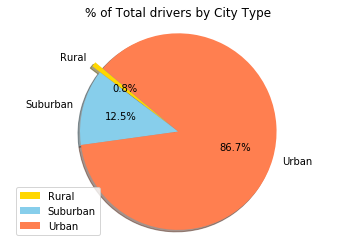

In [78]:
labels = 'Rural', 'Suburban', 'Urban'
sizes = [0.8, 12.5, 86.7,]
colors = ['gold','skyblue','coral']
explode = (0.1, 0, 0,)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.legend(labels,loc=3)
plt.title("% of Total drivers by City Type")
plt.show()